## EJERCICIO VIVIENDAS PRECIO

In [1]:
# Cargar librerías
# Ingesta y análisis de datos
import numpy as np
import pandas as pd
import requests
from fitter import Fitter, get_common_distributions

# Representación de los datos
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Preprocesado
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [2]:
# Cargar el Dataframe
viviendas = pd.read_csv(r'C:\Users\Usuario\Documents\CIENCIA DE DATOS\REPOSITORIO GITHUB\MACHINE LEARNING CON PYTHON ejercicios\6. Ejercicio viviendas precio\HousesDataset.csv', sep="|")

In [3]:
viviendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1728 non-null   int64  
 1   lotSize          1728 non-null   float64
 2   age              1728 non-null   int64  
 3   landValue        1728 non-null   int64  
 4   livingArea       1728 non-null   int64  
 5   pctCollege       1728 non-null   int64  
 6   bedrooms         1728 non-null   int64  
 7   fireplaces       1728 non-null   int64  
 8   bathrooms        1728 non-null   float64
 9   rooms            1728 non-null   int64  
 10  heating          1728 non-null   object 
 11  fuel             1728 non-null   object 
 12  sewer            1728 non-null   object 
 13  waterfront       1728 non-null   object 
 14  newConstruction  1728 non-null   object 
 15  centralAir       1728 non-null   object 
dtypes: float64(2), int64(8), object(6)
memory usage: 216.1+ KB


In [4]:
viviendas.head()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


In [5]:
viviendas.describe()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,211966.705440,0.500214,27.916088,34557.187500,1754.975694,55.567708,3.154514,0.601852,1.900174,7.041667
std,98441.391015,0.698680,29.209988,35021.168056,619.935553,10.333581,0.817351,0.556102,0.658352,2.316453
min,5000.000000,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000
25%,145000.000000,0.170000,13.000000,15100.000000,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,189900.000000,0.370000,19.000000,25000.000000,1634.500000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,259000.000000,0.540000,34.000000,40200.000000,2137.750000,64.000000,4.000000,1.000000,2.500000,8.250000
max,775000.000000,12.200000,225.000000,412600.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000


In [6]:
# Renombrar las variables
viviendas.columns = ["precio", "metros_totales", "antiguedad", "precio_terreno", "metros_habitables",
                     "universitarios", "dormitorios", "chimenea", "banos", "habitaciones", "calefaccion",
                     "consumo_calefacion", "desague", "vistas_lago", "nueva_construccion", "aire_acondicionado"]
viviendas.head()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banos,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


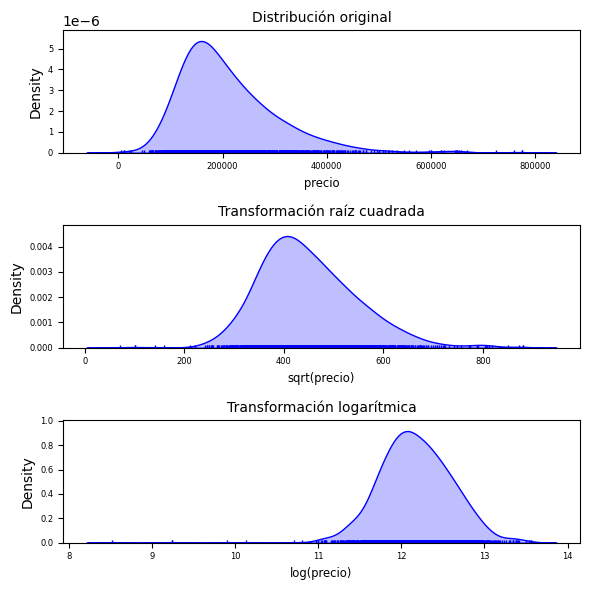

In [7]:
# # Graficar la distribución de los datos de precio de las viviendas
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))

# Distribución original del precio
sns.kdeplot(viviendas.precio, fill=True, color="blue", linewidth=1, ax=axes[0])
sns.rugplot(viviendas.precio, color="blue", ax=axes[0])
axes[0].set_title("Distribución original", fontsize="medium")
axes[0].set_xlabel("precio", fontsize="small")
axes[0].tick_params(labelsize=6)

# Transformación raíz cuadrada del precio
sns.kdeplot(np.sqrt(viviendas.precio), fill=True, color="blue", linewidth=1, ax=axes[1])
sns.rugplot(np.sqrt(viviendas.precio), color="blue", ax=axes[1])
axes[1].set_title("Transformación raíz cuadrada", fontsize="medium")
axes[1].set_xlabel("sqrt(precio)", fontsize="small")
axes[1].tick_params(labelsize=6)

# Transformación logarítmica del precio
sns.kdeplot(np.log(viviendas.precio), fill=True, color="blue", linewidth=1, ax=axes[2])
sns.rugplot(np.log(viviendas.precio), color="blue", ax=axes[2])
axes[2].set_title("Transformación logarítmica", fontsize="medium")
axes[2].set_xlabel("log(precio)", fontsize="small")
axes[2].tick_params(labelsize=6)

fig.tight_layout()


In [8]:
# Ver el ajuste de los datos de precio de las viviendas con varios tipos de distribuciones
from fitter import Fitter, get_common_distributions
distribuciones = ['cauchy', 'chi2', 'expon', 'gamma', 'norm', 'beta', 'logistic']

fitter = Fitter(viviendas.precio, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,2.497420e-11,3068.852573,3090.671453,inf,0.051274,2.180145e-04
logistic,4.913880e-11,3147.967042,3158.876482,inf,0.071310,4.368626e-08
cauchy,5.221450e-11,2956.669693,2967.579133,inf,0.121728,9.001774e-23
chi2,5.835610e-11,3315.562140,3331.926300,inf,0.094392,7.513341e-14
norm,6.947514e-11,3324.534158,3335.443598,inf,0.104149,8.972690e-17
expon,2.915346e-10,2824.103160,2835.012600,inf,0.316530,2.028906e-154
gamma,4.841645e-10,inf,inf,3.958212,0.947917,0.000000e+00


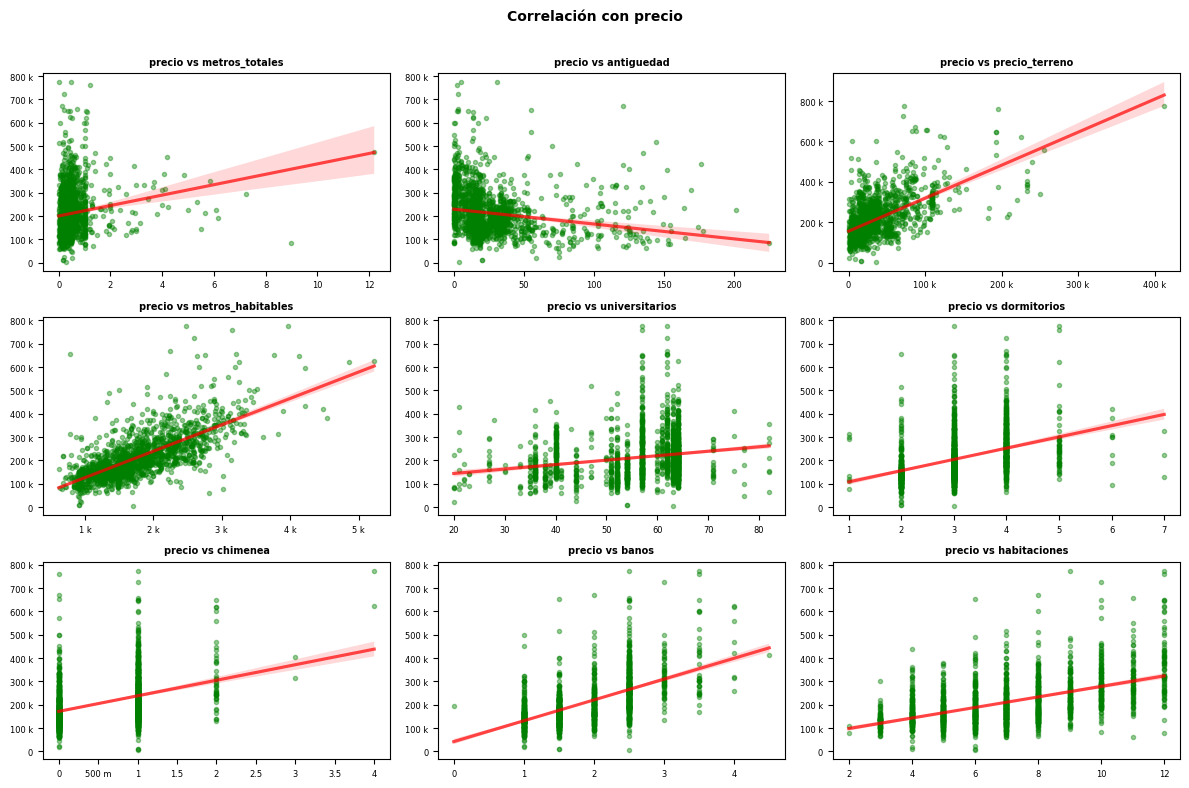

In [9]:
# Gráficas para ver la relación entre la variable de salida y el resto de las variables numéricas
import matplotlib.ticker as ticker

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = axes.flat
columns_numeric = viviendas.select_dtypes(include=['float64', 'int64']).columns
columns_numeric = columns_numeric.drop('precio')

for i, column in enumerate(columns_numeric):
    sns.regplot(x=viviendas[column], y=viviendas['precio'], color="green", marker='.',
                scatter_kws={"alpha": 0.4}, line_kws={"color": "r", "alpha": 0.7}, ax=axes[i])
    axes[i].set_title(f"precio vs {column}", fontsize=7, fontweight="bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize=6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con precio', fontsize=10, fontweight="bold")
plt.show()

In [10]:
print(viviendas.dtypes)

precio                  int64
metros_totales        float64
antiguedad              int64
precio_terreno          int64
metros_habitables       int64
universitarios          int64
dormitorios             int64
chimenea                int64
banos                 float64
habitaciones            int64
calefaccion            object
consumo_calefacion     object
desague                object
vistas_lago            object
nueva_construccion     object
aire_acondicionado     object
dtype: object


In [11]:
viviendas_numericas = viviendas.select_dtypes(include=['number'])

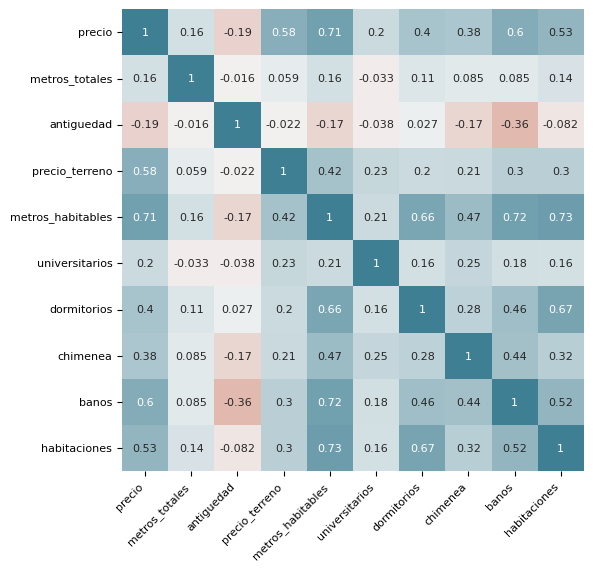

In [12]:
# Crear matriz de correlación
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.heatmap(
    viviendas_numericas.corr(),
    annot=True,
    cbar=False,  
    annot_kws={"size": 8},
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    ax=ax)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment="right",)
ax.tick_params(labelsize=8)

In [13]:
# Ver el describe de las columnas tipo object
viviendas.select_dtypes(include=['object']).describe()

,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
count,1728,1728,1728,1728,1728,1728
unique,3,3,3,2,2,2
top,hot air,gas,public/commercial,No,No,No
freq,1121,1197,1213,1713,1647,1093


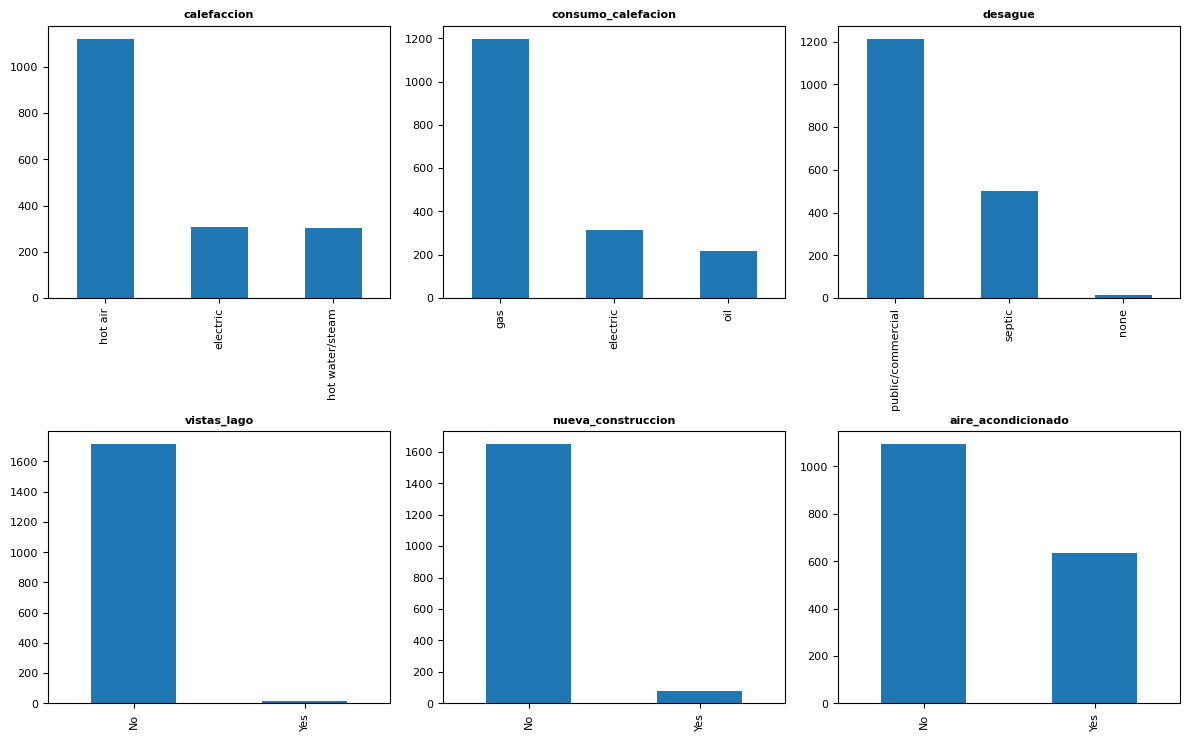

In [14]:
# Ver la distribución de valores en variables categóricas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flat
columns_object = viviendas.select_dtypes(include=['object']).columns

for i, column in enumerate(columns_object):
    viviendas[column].value_counts().plot.bar(ax=axes[i])  # Corrección: "bar" en lugar de "bash"
    axes[i].set_title(column, fontsize=8, fontweight="bold")
    axes[i].tick_params(labelsize=8)
    axes[i].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top=0.9)

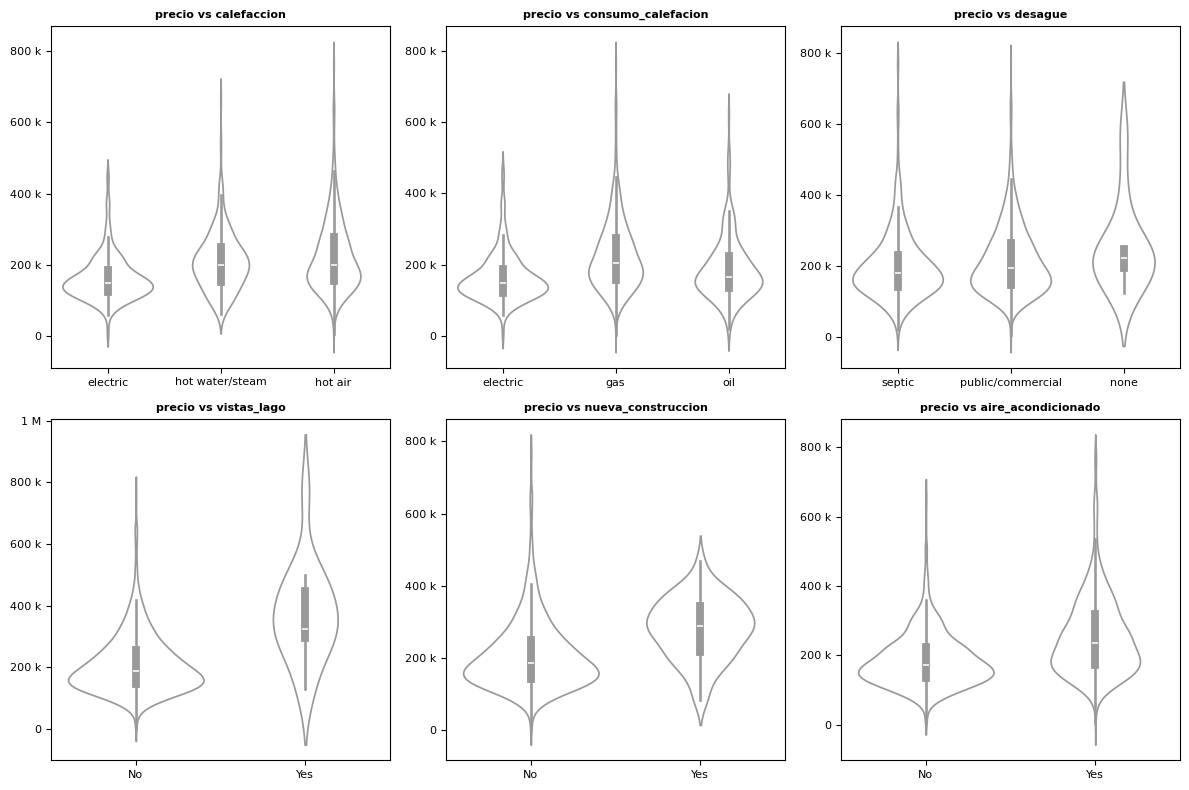

In [15]:
# Ver la relación entre cada variable categórica de un Dataframe y la variable numérica de salida
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flat
columns_object = viviendas.select_dtypes(include=['object']).columns

for i, column in enumerate(columns_object):
    sns.violinplot(
        x=column,
        y="precio",
        data=viviendas,  # Corrección: usar el DataFrame correcto
        color="white",
        ax=axes[i]
    )
    axes[i].set_title(f"precio vs {column}", fontsize=8, fontweight="bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())  # Formatear eje Y a notación de ingeniería
    axes[i].tick_params(labelsize=8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

fig.tight_layout()

In [16]:
import seaborn as sns
print(sns.__version__)

0.13.2


C:\Users\Usuario\AppData\Local\Temp\ipykernel_10948\3184591749.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(viviendas[column], hist=True, rug=True,
c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_10948\3184591749.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `disp

Text(0.5, 0.98, 'Distribución variables numéricas')

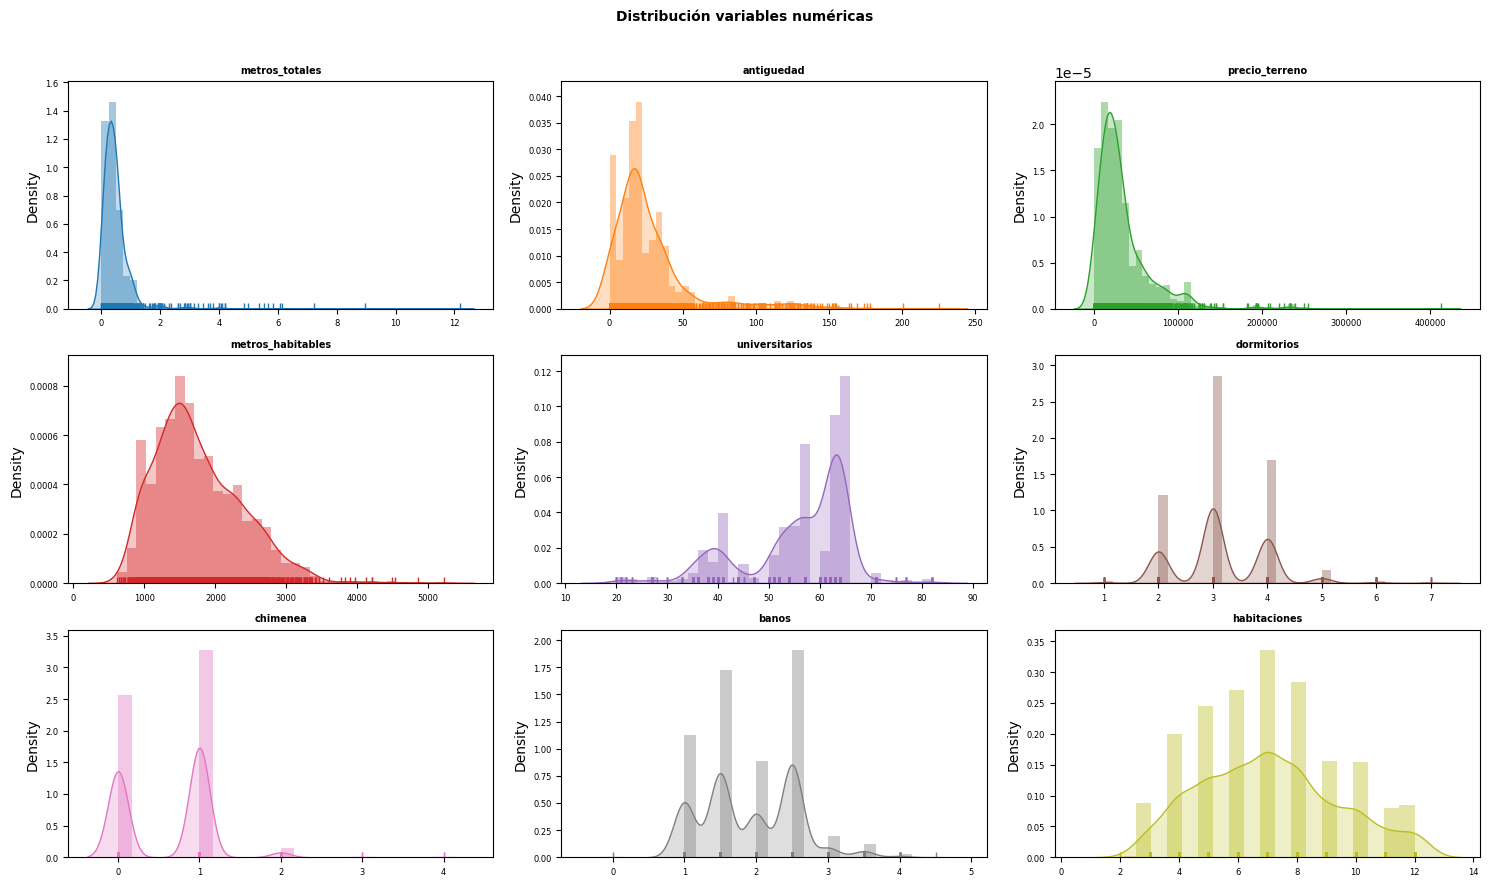

In [17]:
# Representación de las distribuciones estadísticas de varias variables numéricas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 9))
axes = axes.flat
columnas_numeric = viviendas.select_dtypes(include=['float64', 'int64']).columns
columnas_numeric = columnas_numeric.drop('precio')
for i, column in enumerate(columnas_numeric):
    sns.distplot(viviendas[column], hist=True, rug=True,
                 color=(list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
                 kde_kws={'shade': True, 'linewidth': 1}, ax=axes[i])
    axes[i].set_title(column, fontsize=7, fontweight="bold")
    axes[i].tick_params(labelsize=6)
    axes[i].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables numéricas', fontsize=10, fontweight="bold")

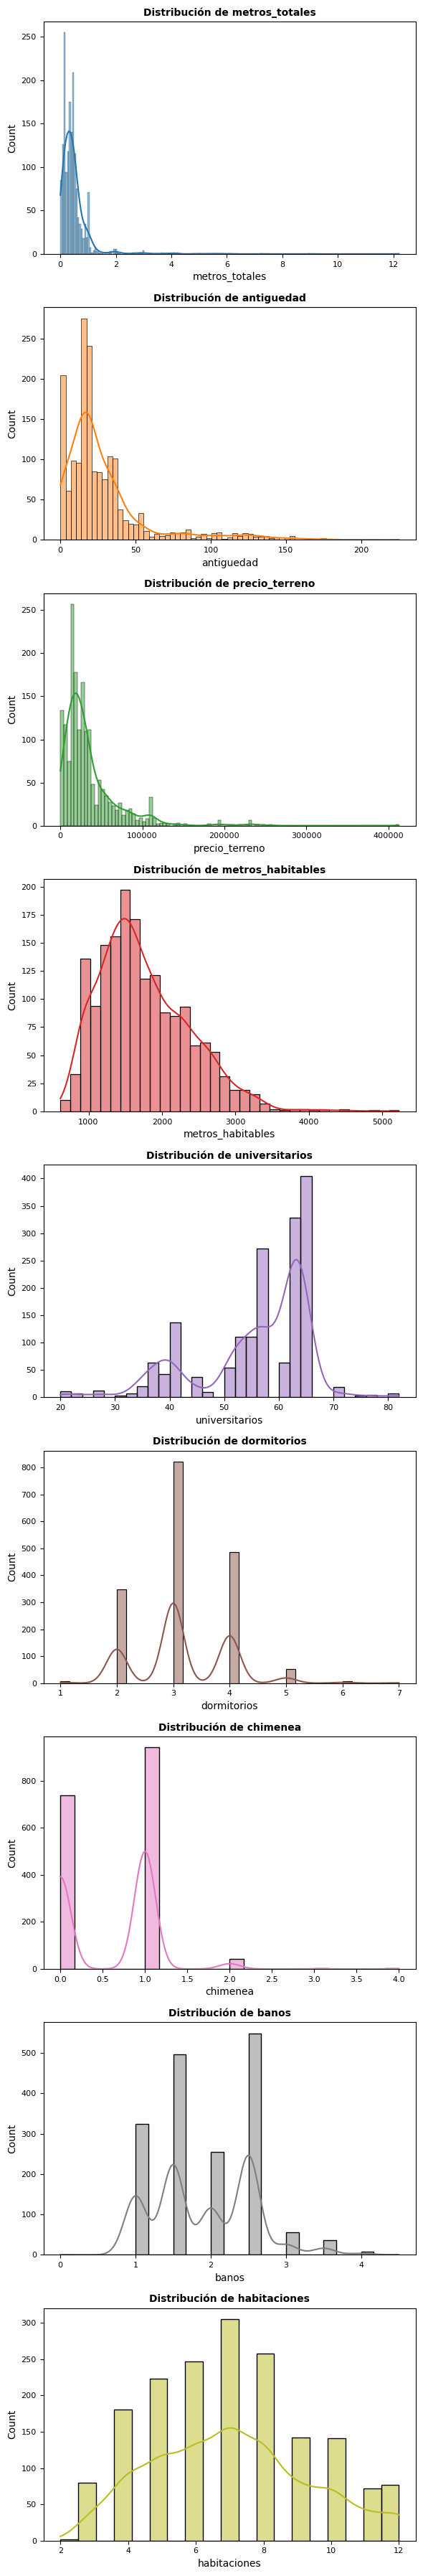

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear subplots para múltiples histogramas
fig, axes = plt.subplots(len(columnas_numeric), 1, figsize=(6, 4 * len(columnas_numeric)))
axes = axes.flatten()

# Iterar sobre las columnas numéricas
for i, column in enumerate(columnas_numeric):
    sns.histplot(
        data=viviendas, x=column, kde=True, ax=axes[i], 
        color=(list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"]
    )
    axes[i].set_title(f"Distribución de {column}", fontsize=10, fontweight="bold")
    axes[i].tick_params(labelsize=8)

plt.tight_layout()
plt.show()

In [19]:
# Contar los valores de la columna chimenea
viviendas.chimenea.value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       0
2       1
3       1
4       0
       ..
1723    1
1724    1
1725    0
1726    1
1727    0
Name: chimenea, Length: 1728, dtype: int64>

In [20]:
# Cambiar formato de la columna chimenea, que es int64, a tipo str que es cadena de caracteres
viviendas.chimenea = viviendas.chimenea.astype("str")
viviendas.chimenea

0       1
1       0
2       1
3       1
4       0
       ..
1723    1
1724    1
1725    0
1726    1
1727    0
Name: chimenea, Length: 1728, dtype: object

In [21]:
viviendas.chimenea.value_counts().sort_index()

chimenea
0    740
1    942
2     42
3      2
4      2
Name: count, dtype: int64

In [22]:
# Transformar las chimeneas 2, 3 y 4 en una sola categoría que sea 2_mas
dic_replace = {'2': "2_mas", '3': "2_mas", '4': "2_mas"}
viviendas['chimenea'] = viviendas['chimenea'].map(dic_replace).fillna(viviendas['chimenea'])
viviendas.chimenea.value_counts().sort_index()

chimenea
0        740
1        942
2_mas     46
Name: count, dtype: int64

In [23]:
# Binarización de variables categóricas y estandarización de variables numéricas
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector
import numpy as np
import pandas as pd

# Seleccionar columnas numéricas y categóricas
numeric_cols = viviendas.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_cols = viviendas.select_dtypes(include=['object', 'category']).columns.to_list()

# Definir el preprocesador
preprocessor = ColumnTransformer(
    [('scale', StandardScaler(), numeric_cols),
     ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
    remainder='passthrough')

# Ajustar y transformar los datos
viviendas_prep = preprocessor.fit_transform(viviendas)

# Obtener los nombres de las columnas codificadas
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names_out(cat_cols)

# Combinar los nombres de las columnas numéricas y categóricas codificadas
labels = np.concatenate([numeric_cols, encoded_cat])

# Transformar los datos y convertir a DataFrame
datos_viviendas_prep = pd.DataFrame(viviendas_prep, columns=labels)

# Mostrar información del DataFrame
datos_viviendas_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   precio                       1728 non-null   float64
 1   metros_totales               1728 non-null   float64
 2   antiguedad                   1728 non-null   float64
 3   precio_terreno               1728 non-null   float64
 4   metros_habitables            1728 non-null   float64
 5   universitarios               1728 non-null   float64
 6   dormitorios                  1728 non-null   float64
 7   banos                        1728 non-null   float64
 8   habitaciones                 1728 non-null   float64
 9   chimenea_0                   1728 non-null   float64
 10  chimenea_1                   1728 non-null   float64
 11  chimenea_2_mas               1728 non-null   float64
 12  calefaccion_electric         1728 non-null   float64
 13  calefaccion_hot ai

In [24]:
# Agrupación de transformaciones en pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Seleccionar columnas numéricas y categóricas
numeric_cols = viviendas.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_cols = viviendas.select_dtypes(include=['object', 'category']).columns.to_list()

# Transformador para columnas numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Transformador para columnas categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocesador general
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    remainder='passthrough'
)

# Ajustar y transformar los datos
viviendas_prep = preprocessor.fit_transform(viviendas)

# Obtener nombres de las características de las columnas categóricas
encoded_cat = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cat_cols)

# Concatenar nombres de columnas numéricas y categóricas
labels = np.concatenate([numeric_cols, encoded_cat])

# Crear un DataFrame con los datos transformados
datos_viviendas_prep = pd.DataFrame(viviendas_prep, columns=labels)

# Mostrar información del DataFrame
datos_viviendas_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   precio                       1728 non-null   float64
 1   metros_totales               1728 non-null   float64
 2   antiguedad                   1728 non-null   float64
 3   precio_terreno               1728 non-null   float64
 4   metros_habitables            1728 non-null   float64
 5   universitarios               1728 non-null   float64
 6   dormitorios                  1728 non-null   float64
 7   banos                        1728 non-null   float64
 8   habitaciones                 1728 non-null   float64
 9   chimenea_0                   1728 non-null   float64
 10  chimenea_1                   1728 non-null   float64
 11  chimenea_2_mas               1728 non-null   float64
 12  calefaccion_electric         1728 non-null   float64
 13  calefaccion_hot ai

In [25]:
# División de los datos en subconjuntos de entrenamiento y de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( viviendas.drop('precio', axis = 'columns'), 
                                                     viviendas['precio'], train_size = 0.8, random_state = 1234, 
                                                     shuffle = True )

In [26]:
y_train.describe()

count      1382.000000
mean     211436.516643
std       96846.639129
min       10300.000000
25%      145625.000000
50%      190000.000000
75%      255000.000000
max      775000.000000
Name: precio, dtype: float64

In [27]:
y_test.describe()

count       346.000000
mean     214084.395954
std      104689.155889
min        5000.000000
25%      139000.000000
50%      180750.000000
75%      271750.000000
max      670000.000000
Name: precio, dtype: float64